# Multivariate Linear Regression

$ h_\theta(x) = \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2 + ...  + \theta_n * x_n $

$ x_0 = 1$

## Cost function

$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

## Gradient descent

repeat until convergence {

>$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $

}

$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def std_normalize(axis):
    """Rescale numpy 1-D array between <0, 1>"""
    a1 = axis.A1
    
    a_mean = np.mean(a1)
    a_std = np.std(a1)
    
    a_prim = list(map(lambda x: 1.0 * (x-a_mean) / a_std, a1))
    return a_prim, a_mean, a_std

# We will use simpler version when applying to matrix
def std_n(axis):
    a_prim, mean_a, std_a = std_normalize(axis)
    
    return a_prim

## Hypothesis

$ h_\theta(x) = \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2 $

,where:

$ x_0 = 1 $ (used to make math easier)

$ x_1 $ - Weight (kilograms)

$ x_2 $ - Age (years)


| Weight (kilograms) | Age (years) | Blood fat content |
|--------------------|-------------|-------------------|
| 84 | 46 | 354 |
| 73 | 20 | 190 |
| 65 | 52 | 405 |
| 70 | 30 | 263 |
| 76 | 57 | 451 |
| 69 | 25 | 302 |
| 63 | 28 | 288 |
| 72 | 36 | 385 |
| 79 | 57 | 402 |
| 75 | 44 | 365 |
| 27 | 24 | 209 |
| 89 | 31 | 290 |
| 65 | 52 | 346 |
| 57 | 23 | 254 |
| 59 | 60 | 395 |
| 69 | 48 | 434 |
| 60 | 34 | 220 |
| 79 | 51 | 374 |
| 75 | 50 | 308 |
| 82 | 34 | 220 |
| 59 | 46 | 311 |
| 67 | 23 | 181 |
| 85 | 37 | 274 |
| 55 | 40 | 303 |
| 63 | 30 | 244 | 

In [2]:
X = np.matrix([[84, 46],
    [73, 20],
    [65, 52],
    [70, 30],
    [76, 57],
    [69, 25],
    [63, 28],
    [72, 36],
    [79, 57],
    [75, 44],
    [27, 24],
    [89, 31],
    [65, 52],
    [57, 23],
    [59, 60],
    [69, 48],
    [60, 34],
    [79, 51],
    [75, 50],
    [82, 34],
    [59, 46],
    [67, 23],
    [85, 37],
    [55, 40],
    [63, 30]])


# We need to store mean and standard deviation value
_, WEIGHT_MEAN, WEIGHT_STD = std_normalize(X.T[0])
_, AGE_MEAN, AGE_STD = std_normalize(X.T[1])

# Rescale X values
X = np.apply_along_axis(std_n, axis=0, arr=X)

X.shape

(25, 2)

In [3]:
Y = np.matrix('354; 190; 405; 263; 451; 302; 288; 385; 402; 365; 209; 290; 346; 254; 395; 434; 220; 374; 308; 220; 311; 181; 274; 303; 244')

Y.shape

(25, 1)

In [4]:
theta = np.matrix([[0.1], [0.1], [0.1]])
theta.shape

(3, 1)

In [5]:
# Before we start, we need to add extra column for x_0
# It will allow us to use matrix multiplication while 
# calculating our hypothesis
ones = np.ones((X.shape[0], 1))

X = np.append(ones, X, axis=1)
X.shape

(25, 3)

In [6]:
# Initial hypothesis
h_theta = X * theta
h_theta.shape

(25, 1)

In [7]:
# Number of training examples
m = X.shape[0]

# Initial cost 
J = np.sum(np.power(h_theta - Y, 2)) * 1/(2*m)
J

51141.536981119672

In [8]:
alpha = 0.01

J_arr = []
n = 0

while J > 0.001 and n < 10000:
    J_arr.append(J)

    t = alpha * ((h_theta - Y).T.dot(X)) * 1/m 
    theta = theta - t.T

    h_theta = X * theta
    J = np.sum(np.power(h_theta - Y, 2)) * 1/(2*m)

    n += 1

theta    

matrix([[ 310.72      ],
        [   5.20445015],
        [  62.60465382]])

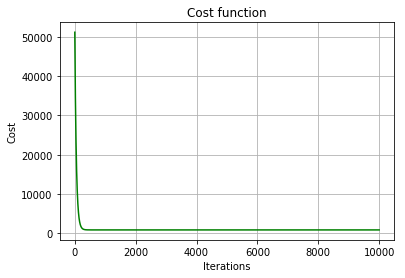

Final cost = 856.12450699


In [9]:
plt.plot(xrange(len(J_arr)), J_arr, 'g')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.show()

print('Final cost = {0}'.format(J_arr[-1]))

Now, we can predict value using learned $\theta$ params.

New features must be scaled with saved mean value and standard deviation.

In [10]:
def predict(weight, age, theta):
    w = 1.0 * (weight-WEIGHT_MEAN) / WEIGHT_STD
    a = 1.0 * (age-AGE_MEAN) / AGE_STD
    
    a = np.array([1, w, a])
    
    return round(np.dot(a, theta.A1), 2)


data = [(55, 21), (65, 31), (75, 41), (85, 51), (95, 61)]

for w, a in data:
    predicted_fat = predict(weight=w, age=a, theta=theta)
    print('Weight={0}; Age={1}; Predicted blood fat content={2}'.format(w, a, predicted_fat))

Weight=55; Age=21; Predicted blood fat content=210.49
Weight=65; Age=31; Predicted blood fat content=266.83
Weight=75; Age=41; Predicted blood fat content=323.16
Weight=85; Age=51; Predicted blood fat content=379.5
Weight=95; Age=61; Predicted blood fat content=435.84
